# 概率與統計入門  
在這份筆記中，我們將探索一些之前討論過的概念。許多概率與統計的概念在 Python 的主要數據處理庫中都有良好的呈現，例如 `numpy` 和 `pandas`。


In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## 隨機變量與分佈
我們先從 0 到 9 的均勻分佈中抽取一個包含 30 個值的樣本。我們還會計算平均值和方差。


In [2]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [4, 8, 5, 10, 5, 1, 1, 1, 7, 9, 7, 0, 2, 7, 3, 5, 9, 8, 3, 10, 2, 9, 2, 9, 9, 8, 1, 8, 7, 3]
Mean = 5.433333333333334
Variance = 10.178888888888887


要視覺化估算樣本中有多少不同的值，我們可以繪製**直方圖**：


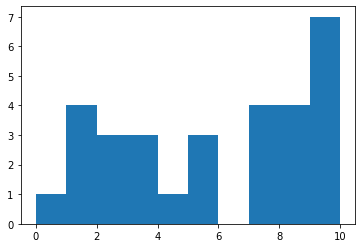

In [3]:
plt.hist(sample)
plt.show()

## 分析真實數據

在分析真實世界的數據時，平均值和方差是非常重要的。我們來載入有關棒球運動員的數據，數據來源於 [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)


In [4]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Height','Weight','Age'])
df

Name Team            Role  Height  Weight    Age
0       Adam_Donachie  BAL         Catcher      74   180.0  22.99
1           Paul_Bako  BAL         Catcher      74   215.0  34.69
2     Ramon_Hernandez  BAL         Catcher      72   210.0  30.78
3        Kevin_Millar  BAL   First_Baseman      72   210.0  35.43
4         Chris_Gomez  BAL   First_Baseman      73   188.0  35.71
...               ...  ...             ...     ...     ...    ...
1029    Brad_Thompson  STL  Relief_Pitcher      73   190.0  25.08
1030    Tyler_Johnson  STL  Relief_Pitcher      74   180.0  25.73
1031   Chris_Narveson  STL  Relief_Pitcher      75   205.0  25.19
1032    Randy_Keisler  STL  Relief_Pitcher      75   190.0  31.01
1033      Josh_Kinney  STL  Relief_Pitcher      73   195.0  27.92

[1034 rows x 6 columns]

我們在這裡使用一個名為 [**Pandas**](https://pandas.pydata.org/) 的套件進行數據分析。在這門課程的後續部分，我們會更詳細地討論 Pandas 以及如何在 Python 中處理數據。

現在讓我們計算年齡、身高和體重的平均值：


In [5]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height     73.697292
Weight    201.689255
dtype: float64

現在讓我們專注於身高，並計算標準差和方差：


In [6]:
print(list(df['Height'])[:20])

[74, 74, 72, 72, 73, 69, 69, 71, 76, 71, 73, 73, 74, 74, 69, 70, 72, 73, 75, 78]


In [7]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 73.6972920696325
Variance = 5.316798081118074
Standard Deviation = 2.3058183105175645


除了平均值，查看中位數和四分位數也是有意義的。它們可以使用一個**箱型圖**來可視化：


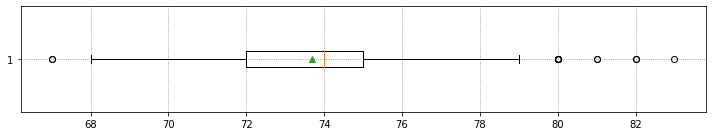

In [8]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

我們也可以製作數據集子集的箱型圖，例如按玩家角色分組。


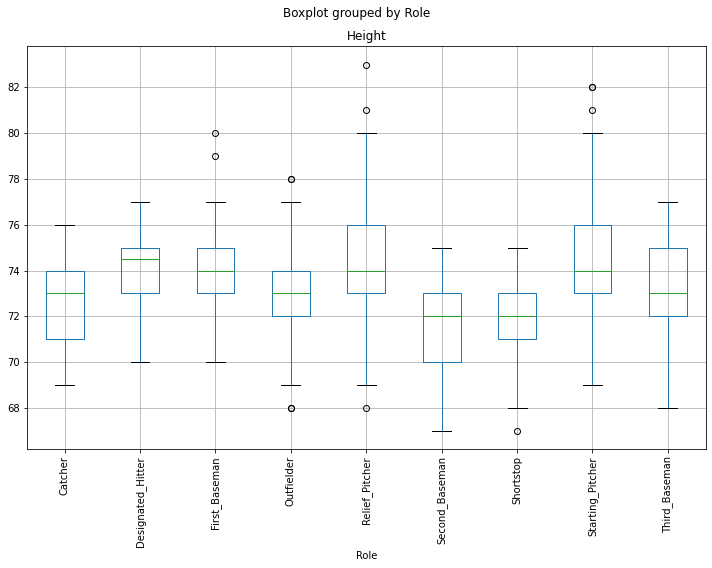

In [9]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **注意**：這個圖表顯示，平均而言，一壘手的身高比二壘手的身高更高。我們稍後會學習如何更正式地檢驗這個假設，以及如何證明我們的數據在統計上具有顯著性來支持這一點。

年齡、身高和體重都是連續隨機變量。你認為它們的分佈是怎樣的？一個好的方法是繪製它們的直方圖：


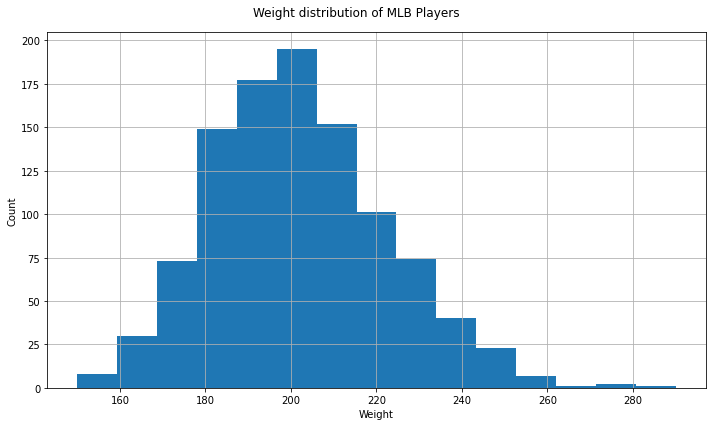

In [10]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 常態分佈

讓我們建立一個符合常態分佈的人工樣本，其平均值和變異數與我們的真實數據相同：


In [11]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([73.46072234, 70.40678311, 70.23689776, 73.81190675, 72.41091792,
       76.00127651, 71.91641414, 77.18162239, 76.7173353 , 73.93996587,
       74.2862748 , 76.88034696, 72.15184905, 74.43537605, 76.37723417,
       65.66976051, 74.3200533 , 77.3235274 , 72.8840488 , 77.50300255])

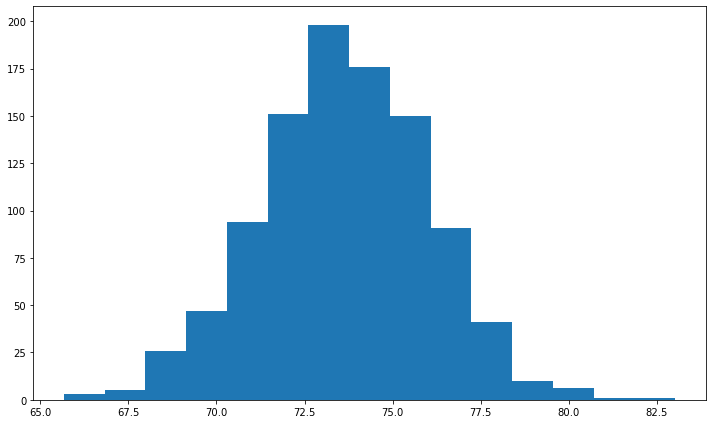

In [12]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

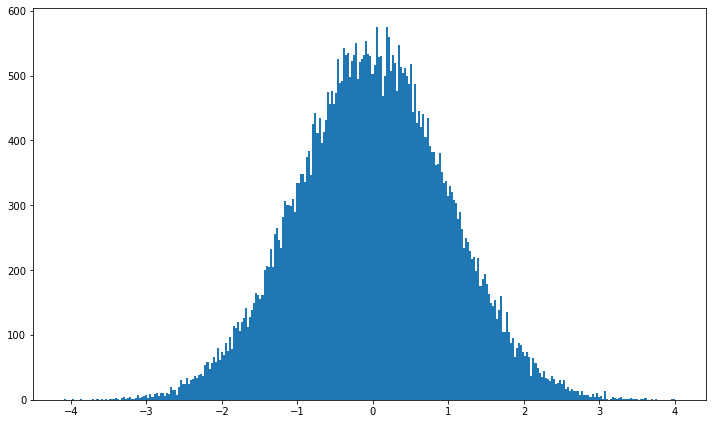

In [13]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

由於現實生活中的大多數數值呈正態分佈，我們不應使用均勻隨機數生成器來生成樣本數據。以下是如果我們嘗試使用均勻分佈（由 `np.random.rand` 生成）來生成重量時會發生的情況：


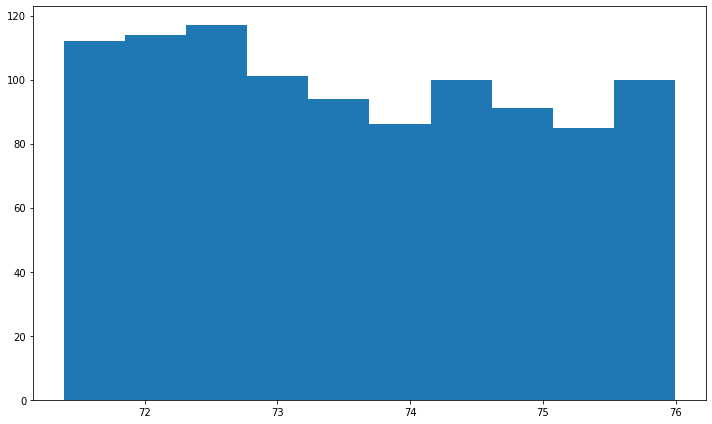

In [14]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## 信賴區間

現在讓我們計算棒球運動員體重和身高的信賴區間。我們將使用[這個 StackOverflow 討論中的程式碼](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data)：


In [15]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 201.73 ± 0.94
p=0.90, mean = 201.73 ± 1.08
p=0.95, mean = 201.73 ± 1.28


## 假設檢定

讓我們來探索棒球球員數據集中的不同角色：


In [16]:
df.groupby('Role').agg({ 'Height' : 'mean', 'Weight' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Height      Weight  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.163636    221
Third_Baseman      73.044444  200.955556     45

In [17]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 73.62..74.38, 2nd basemen height: 71.04..71.69
Conf=0.90, 1st basemen height: 73.56..74.44, 2nd basemen height: 70.99..71.73
Conf=0.95, 1st basemen height: 73.47..74.53, 2nd basemen height: 70.92..71.81


我們可以看到這些區間並沒有重疊。

一個在統計學上更正確的方法來驗證這個假設是使用 **Student t-test**：


In [18]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 7.65
P-value: 9.137321189738925e-12


`ttest_ind` 函數返回的兩個值分別是：  
* p-value 可視為兩個分佈具有相同平均值的概率。在我們的情況下，p-value 非常低，這意味著有強烈的證據支持一壘手的身高較高。  
* t-value 是 t 檢驗中使用的標準化平均差異的中間值，並且會與給定置信值的閾值進行比較。  


## 使用中央極限定理模擬正態分佈

Python 的偽隨機生成器旨在提供均勻分佈。如果我們想創建一個正態分佈的生成器，可以利用中央極限定理。要獲得一個正態分佈的值，我們只需計算均勻生成樣本的平均值。


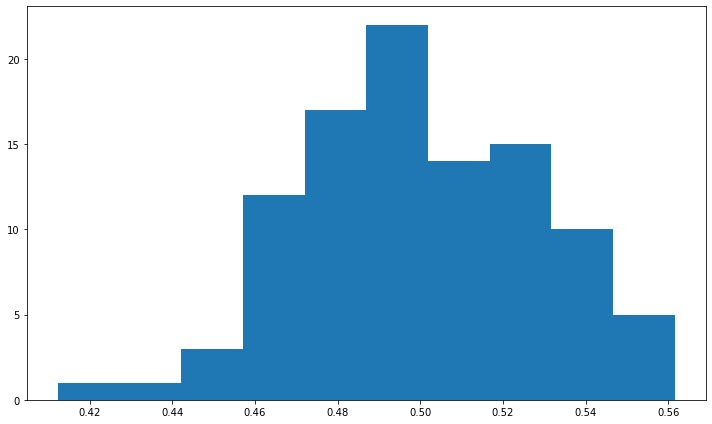

In [19]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## 相關性與邪惡棒球公司

相關性讓我們能夠找出數據序列之間的關係。在我們的簡單例子中，假設有一家邪惡的棒球公司，根據球員的身高來支付薪水——球員越高，薪水就越多。假設基本薪水是 $1000，並根據身高額外提供 $0 至 $100 的獎金。我們將使用 MLB 的真實球員數據，計算他們的虛構薪水：


In [20]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(74, 1075.2469071629068), (74, 1075.2469071629068), (72, 1053.7477908306478), (72, 1053.7477908306478), (73, 1064.4973489967772), (69, 1021.4991163322591), (69, 1021.4991163322591), (71, 1042.9982326645181), (76, 1096.746023495166), (71, 1042.9982326645181)]


現在讓我們計算這些序列的共變異數和相關性。`np.cov` 會給我們一個所謂的 **共變異數矩陣**，這是共變異數在多個變量上的延伸。共變異數矩陣 $M$ 的元素 $M_{ij}$ 是輸入變量 $X_i$ 和 $X_j$ 之間的相關性，而對角線上的值 $M_{ii}$ 是 $X_{i}$ 的變異數。同樣地，`np.corrcoef` 會給我們 **相關矩陣**。


In [21]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[  5.31679808  57.15323023]
 [ 57.15323023 614.37197275]]
Covariance = 57.153230230544736
Correlation = 1.0


相關性等於 1 表示兩個變數之間存在強烈的**線性關係**。我們可以通過將一個值與另一個值作圖來直觀地看到線性關係：


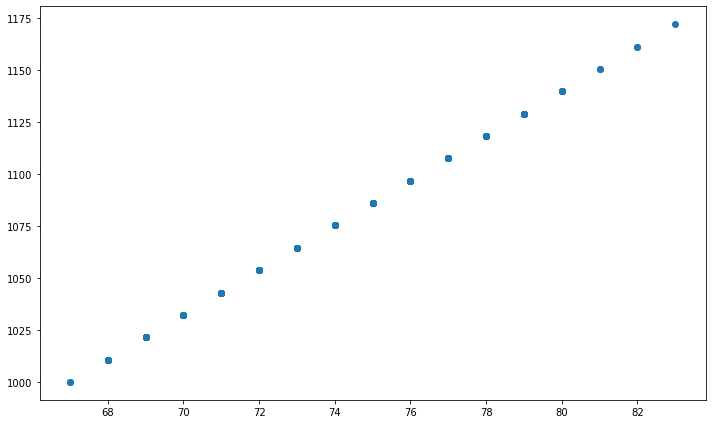

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

讓我們看看如果關係不是線性的會發生什麼。假設我們的公司決定隱藏高度和薪水之間明顯的線性依賴性，並在公式中引入一些非線性，例如 `sin`:


In [23]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9835304456670837


在這種情況下，相關性略低一些，但仍然相當高。現在，為了使關係更不明顯，我們可能想通過向薪水添加一些隨機變量來增加一些額外的隨機性。讓我們看看會發生什麼：


In [24]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9363097848296155


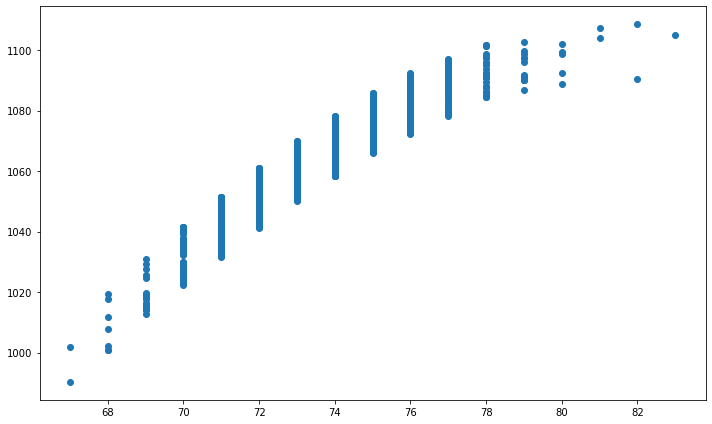

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

你能猜到為什麼這些點會排列成垂直線嗎？

我們已經觀察到像薪水這樣的人為設計概念與觀察變數*身高*之間的關聯。現在讓我們看看兩個觀察變數，例如身高和體重，是否也有相關性：


In [26]:
np.corrcoef(df['Height'],df['Weight'])

array([[ 1., nan],
       [nan, nan]])

很可惜，我們沒有得到任何結果——只有一些奇怪的 `nan` 值。這是因為我們的數列中有一些值是未定義的，用 `nan` 表示，這導致運算的結果也變成未定義。通過查看矩陣，我們可以看到問題出在 `Weight` 這一列，因為 `Height` 值之間的自相關已經被計算出來。

> 這個例子顯示了**數據準備**和**清理**的重要性。沒有適當的數據，我們無法計算出任何結果。

讓我們使用 `fillna` 方法來填補缺失值，然後計算相關性：


In [27]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

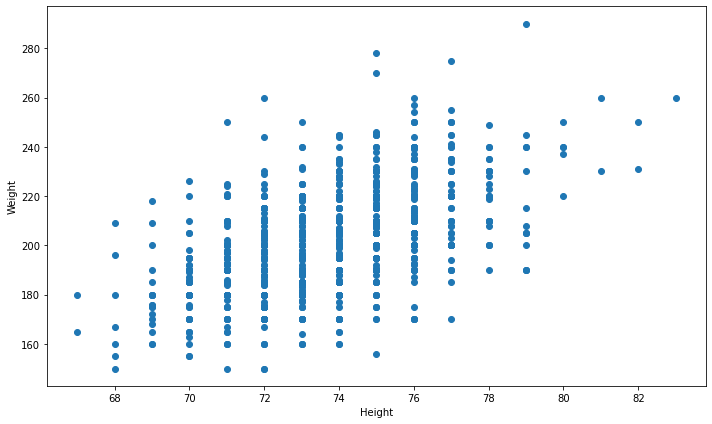

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.tight_layout()
plt.show()

## 結論

在這份筆記中，我們學習了如何對數據進行基本操作以計算統計函數。我們現在知道如何使用完善的數學和統計工具來驗證一些假設，以及如何根據數據樣本計算任意變量的置信區間。



---

**免責聲明**：  
此文件已使用 AI 翻譯服務 [Co-op Translator](https://github.com/Azure/co-op-translator) 翻譯。我們致力於提供準確的翻譯，但請注意，自動翻譯可能包含錯誤或不準確之處。應以原始語言的文件作為權威來源。對於關鍵資訊，建議尋求專業人工翻譯。我們對因使用此翻譯而引起的任何誤解或錯誤詮釋概不負責。  
